# Metabolomics Pathway Analysis

ESPOL workshop 2019-08

Shuzhao Li, Ph.D

E-mail: shuzhao.li@gmail.com

## Basics

- Learn to use a code editor, not MS Word
    - A code editor works on plain text and gives you total transparency.
    - The default text editor on MS Windows is Notepad, on Mac OS is TextEdit. 
    - A few free code editors I've used include Atom, Brackets (more for web programming), Geany. 
    - Beginners should avoid IDEs (Integrated Development Environment, e.g. Eclipse)
    - Rstudio, Matlab, IPython are not exactly programming IDEs, more interactive environment for data analysis.
    
- Command line is empowering
    - http://swcarpentry.github.io/shell-novice/

- Understand absolute and relative paths on computers (Google it)

- This is a Jupyter notebook (https://jupyter.readthedocs.io/en/latest/content-quickstart.html) using Python 3. 

- The easiest way to run this is Using Anaconda, a software distribution for Python/R data science
https://www.anaconda.com/distribution/. After installing, you can use the Jupyter notebook within (I used Docker container, which is a more complex alternative but details are not given here.).


# Exercises 1 - Targeted pathway analysis using MetaboAnalyst

Step 1. Go to https://www.metaboanalyst.ca 

Step 2. "click here to start" - "Pathway Analysis"

Step 3. Copy the list in "data/Exercise_1_targeted_significant_list.txt", paste to use here, select "KEGG ID" for the "Input Type" pulldown menu, then "Submit".

Step 4. Soldier through the rest.

# Exercises 2 - Pathway enrichment analysis in command line [optional]

An over-representation test is found in almost all software packages for pathway analysis, using either Fisher's exact test or hypergeometric test (the two are similar for large sample sizes). 

This exercise looks under the hood for the mechanical components, to help understand the principle. The test uses a 2 × 2 contingency table for categories (https://en.wikipedia.org/wiki/Fisher's_exact_test). 

Below is Python code, while it's easy to do in R too.

In [1]:
# import the scipy.stats library
from scipy import stats

# To get metabolites in Folate pathway, as an example
Metabolites_folate_pathway = '''C00044  
C00101  
C00119  
C00156  
C00251  
C00266  
C00268  
C00272  
C00415  
C00504  
C00568  
C00835  
C00921  
C01217  
C01300  
C01304  
C02587  
C02953  
C03541  
C03684  
C04244  
C04807  
C04874  
C04895  
C05922  
C05923  
C05924  
C05925  
C05926  
C05927  
C06148  
C09332  
C11355  
C15522  
C15996  
C16675  
C18237  
C18239  
C18802  
C19848  
C19871  
C20239  
C20248  
C20264  
C20559  
C20562  
C20566  
C20567  
C21007  
C21008  
C21065  
C21094  
C21107  
C21310  
C21485  
C21486  
C21640'''.split()

# significant metabolites
My_Significant_metabolites = '''C00042
C00051
C00051
C00051
C00074
C00120
C00127
C00127
C00128
C00147
C00170
C00184
C00212
C00217
C00239
C00250
C00294
C00307
C00307
C00319
C00327
C00378
C00402
C00418
C00490
C00491
C00504
C00504
C00532
C00532
C00542
C00542
C00570
C00624
C00643
C00645
C00645
C00645
C00780
C00785
C00792
C00795
C00795
C00836
C00921
C00942'''.split()

# to view partial information in the variables
print(Metabolites_folate_pathway[:10])
# the next list has repeats. Never assume data are clean anyways.
print(My_Significant_metabolites[:10])

['C00044', 'C00101', 'C00119', 'C00156', 'C00251', 'C00266', 'C00268', 'C00272', 'C00415', 'C00504']
['C00042', 'C00051', 'C00051', 'C00051', 'C00074', 'C00120', 'C00127', 'C00127', 'C00128', 'C00147']


In [2]:
# The categories are [in pathway, not in pathway], [significant, not significant] 
# To construct the 2 × 2 contingency table as 
# [ [in both, significant but not in pathway], 
#   [in pathway but not significant, not significant nor in pathway] ]

# using set operations to get unique metabolites 
in_both = set(My_Significant_metabolites).intersection(set(Metabolites_folate_pathway))
significant_not_inPathway = set(My_Significant_metabolites).difference(in_both)
inPathway_not_significant = set(Metabolites_folate_pathway).difference(in_both)

# total number of metabolites in a database model. This is actually KEGG Compound number.
Total_Number = 18450

# "not significant nor in pathway" is dependent on the total number of metabolites, i.e. the size of universe
size_in_neither = Total_Number + len(in_both) - len(significant_not_inPathway) - len(inPathway_not_significant)

print(len(in_both), len(significant_not_inPathway), len(inPathway_not_significant), size_in_neither)

# stats.fisher_exact takes the contingency table, and returns oddsratio and p_value
r, p = stats.fisher_exact(
                    [ [len(in_both), len(significant_not_inPathway)],
                      [len(inPathway_not_significant), size_in_neither] ], 
                    'greater')

print("The p value of our significant list enriched for Folate pathway is %f" %(p))

(2, 34, 55, 18363)
The p value of our significant list enriched for Folate pathway is 0.005520


# Exercises 3 - Mapping metabolites to KEGG pathways

Step 1. Go to https://www.genome.jp/kegg/tool/map_pathway2.html

Step 2. Enter "hsa" in the "Search against" box. 

Step 3. Copy the list in "data/Exercise_1_targeted_significant_list.txt", paste to use here, then "Exec".

Step 4. On the result page, click individual pathways to explore. The metabolites from your input should be colored by pink or your designated color.

# Exercises 4 - Explore mummichog output 

From http://mummichog.org, one can find instructions to run local versions of mummichog, and a link to mummichog-server. Only the server version will be supported in future development.

Mummichog does not deal with feature selection, but uses result from upstream statistical analysis. 
Example input:
```
m/z	retention time	p-value	statistic
85.0278	59	0.002657	-3.55
85.0472	124	0.730810	-0.35
85.0653	68	0.086509	1.83
85.1007	16	0.057916	-2.04
86.0595	67	0.076789	-1.89
```

Example output is given at *data/Exercise_4_mummichog_result/*. 

Under the *tables/* subfolder, the result from pathway analysis is in a file that looks like "mcg_pathwayanalysis_workshop_example.xlsx".

The first four columns are:
pathway,	overlap_size,	pathway_size,	p-value.

The p-value is based on permutation, not stock Fisher's exact test above.
The "overlap_size" is the number of significant metabolites in the pathway.
The "pathway_size" is not the size of the pathway in databases, but the number of metabolites in the pathway that were detected in this particular experiment (based on user supplied all metabolomics features).

In this current version, one can use the identifiers of empirical compounds (tentative metabolites, which look like E189, E153, E271, etc) to link back to input features.

A summary is given in *data/Exercise_4_mummichog_result/result.html*, and plots in *data/Exercise_4_mummichog_result/figures/*.


# Exercises 5 - Visualizing pathway significance by barplots

We will use here the mummichog output, *exercise4-data/tables/mcg_pathwayanalysis_somename.tsv*.

There's a .xlsx version of the same data. Python code is used here, but one can do it easily in MS Excel.


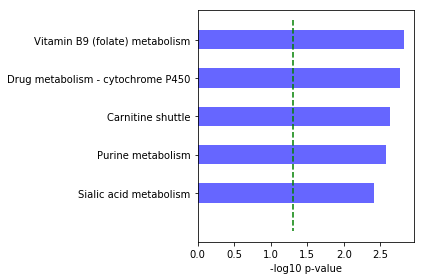

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This is relative path. Running from the directory for these exercise data.
Input_file = "data/day3_mummichog_result/tables/mcg_pathwayanalysis_workshop_example.tsv"

mydata = []
# getting first 5 pathways only
for line in open(Input_file).read().splitlines()[1:6]:
    a = line.split('\t')
    #pathway    overlap_size    pathway_size    p-value
    mydata.append((a[0], float(a[3])))

# plotting
fig, ax = plt.subplots()
ylabels = [x[0] for x in mydata]
data = [-np.log10(x[1]) for x in mydata]
NN = len(data)
ax.barh( range(NN), data, height=0.5, align='center', color="blue", alpha=0.6 )
ax.set_yticks(range(NN))
ax.set_yticklabels(ylabels)
ax.set_xlabel('-log10 p-value')

# to add p=0.05 line
ax.plot([1.301, 1.301], [-0.5, NN], 'g--')    # NN is inverted too
#ax.set_ylim(-0.5, NN)
        
ax.invert_yaxis()
plt.tight_layout()
# to save a PDF file, uncomment the next line
#plt.savefig('outfile.pdf')

# Exercises 6 - Visualizing network/module using Cytoscape [on your own]

We will use here the mummichog output, *data/Exercise_4_mummichog_result/figures/network_modules/*.

Step 1. Get the software from http://cytoscape.org and install to your own computer

Step 2. Start Cytoscape. From the menu, open File/Import/Network/File. Find and use "data/Exercise_4_mummichog_result/figures/network_modules/module1.txt".

Step 3. Use "Node_attributes.txt" to supply compound names to Cytoscape.

Step 4. Try out layout algorithms and styling, etc.

# Exercises 7 - Additional controls in upstream statistics

Pathway statistics is different from that in feature selection, which is usually done upstream to pathway analysis. However, there's generally a lot of noise in metabolomics data. Better quality of input data will help your pathway result. 

We will use here the original dataset in the mummichog paper (Suppl. Dataset 1, Li et al 2013 PLoS Comp Biol), *data/ave_log2_modc_ae_2012.txt*.
The experiment was examining the intracellular metabolome of viral infection of immune cells. There were two controls, baseline samples prior to infection and the samples undergone mock infection. 
The standard test file, "testdata0710.txt", was only based on comparing infected samples vs baseline.
This exercise will apply both of the two biological controls in the experimental design, and add FDR (false discovery rate) correction.

In [4]:
# pandas is a powerful Python data hanlding library, with many equivalent concepts in R
import pandas as pd

# import library containing FDR function
from statsmodels.sandbox.stats.multicomp import multipletests

# get data
input_file = "data/ave_log2_modc_ae_2012.txt"
data = pd.read_table(input_file)

# view/inspect data
data.head()

,mz,retention_time,mock_6hr_01,mock_6hr_02,mock_6hr_03,p_0hr_01,p_0hr_02,p_0hr_03,yf_6hr_01,yf_6hr_02,yf_6hr_03
0,85.02783,59,17.23,17.18,17.44,15.67,15.57,17.26,16.94,16.98,16.56
1,85.04717,124,16.53,15.80,16.62,14.37,14.85,15.63,16.71,15.65,16.27
2,85.06532,68,10.80,10.61,11.36,14.87,14.89,12.53,14.42,14.03,10.81
3,85.10073,16,13.32,13.16,13.42,13.77,12.42,13.31,12.99,12.99,12.95
4,86.05951,67,18.42,18.15,18.37,15.18,17.02,17.91,17.76,17.67,15.15


In [5]:
# get group definition
# This can be from user supplied file.

# manually define here for this example dataset
header = [x for x in data]
baseline = [x for x in header[2:] if '0hr' in x]
mock = [x for x in header[2:] if 'mock_6hr' in x]
yfv = [x for x in header[2:] if 'yf_6hr' in x]

print("groups: ", (baseline, mock, yfv))

number_features = data.shape[0]
# this line select columns by sample names
data_baseline, data_mock, data_yfv = data[baseline].values, data[mock].values, data[yfv].values

# The plan here is to do two t-tests, and combine the p-values. 
# Alternatively, one could select the features that are significant in both tests (as in the original paper).
# ANOVA can be used to compare all three groups together, but loses the focus on infected samples.

p_values, t_scores = [], []
for ii in range(number_features):
    # this is t-test on independent samples
    # p_values_1: compare yfv and baseline; p_values_2: compare yfv and mock
    t1, p1 = stats.ttest_ind(data_yfv[ii,:], data_baseline[ii,:])
    t2, p2 = stats.ttest_ind(data_yfv[ii,:], data_mock[ii,:])
    # nan may be returned
    if np.isnan(t1): t1,p1 = 0,1
    if np.isnan(t2): t2,p2 = 0,1
    
    # This appends combined p-values by Fisher's method. 
    # One could improve it by further considering dependency btw the two p-values.
    p_values.append( stats.combine_pvalues([p1, p2])[1] )
    # We take t2 score for convenience here
    t_scores.append(t2)
        
# Compute FDR using Benjamini-Hochberg procedure
fdrs = multipletests(p_values, method = 'fdr_bh')[1]

# sort output by ascending p-values
# output will include feature intensity data, to be used for Exercise 9
new = []
for ii in range(number_features):
    mz, rtime = data.values[ii, :2]
    intensities = list(data.values[ii, 2:])
    new.append([p_values[ii]] + [str(x) for x in [
                mz, rtime, fdrs[ii], t_scores[ii], 'row_'+str(ii+1), p_values[ii]] + intensities])
new.sort()

# output format 
# mz, rtime, FDR, t, row_num, p, samples...
s = '\t'.join(['m/z', 'retention_time', 'FDR_BH', 't-score', 'row_number', 'p-value'] + header[2:]) + '\n'
for L in new:
    s += '\t'.join(L[1:]) + '\n'
    
with open("updated_yfv_result.txt", "w") as file:
    file.write(s)


('groups: ', (['p_0hr_01', 'p_0hr_02', 'p_0hr_03'], ['mock_6hr_01', 'mock_6hr_02', 'mock_6hr_03'], ['yf_6hr_01', 'yf_6hr_02', 'yf_6hr_03']))


### Summary of Exercise 7

The above code block generates a list of features and their combined p-values in comparing yfv and baseline, and comparing yfv and mock. Benjamini-Hochberg FDR was then applied to these p-values.

Now use the resulting "updated_yfv_result.txt" as input to run mummichog, setting cutoff at FDR < 0.01 (threshold on server, or using -c 0.01 in command line) 


# Exercises 8 - MWAS + mummichog (on your own)

MWAS (metabolome wide association study) is widely used in population studies.

For example, one can use linear regression models to test the assoication of each metabolite feature with a disease score:

```
Disease_score = metabolite_feature + age + gender + known_risk_factor
```

The p-values from the above model can be saved to the format of [m/z, rtime, p-value, beta, ...] to a text file, which can be used as input to run mummichog. 

This MWAS + mummichog approach can thus produce a rapid interpretation of pathways associated with a disease.


# Exercises 9 - Additional data visualization

Manhattan plots and pathway bar plots can be generated during mummichog analysis.

It is important to inspect the key metabolite features that contribute to significant pathways. For those, heatmaps and box plots are commonly used to visualize metabolite concentrations.

/Users/sli/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


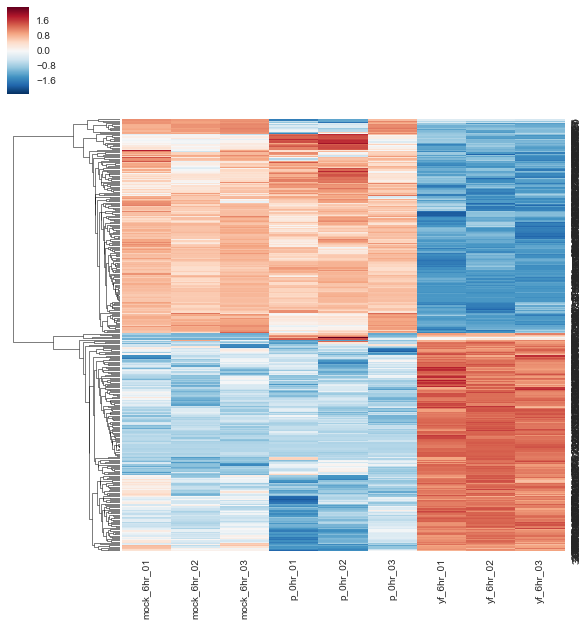

In [6]:
# Heatmap for features with FDR < 0.01, code partially by Andrei Todor

# seaborn is a nice visualization library, https://seaborn.pydata.org/
import seaborn as sns

# using data from Exercise 7
mydata9 = pd.read_table("updated_yfv_result.txt")
sns.set()
d = mydata9.loc[mydata9.FDR_BH < 0.01, :].iloc[:, 6:]
g = sns.clustermap(d, col_cluster=False, z_score=0, figsize=(10, 10))
sns.plt.show()

mock_6hr_01    17.34
mock_6hr_02    17.73
mock_6hr_03    17.85
p_0hr_01       15.35
p_0hr_02        15.4
p_0hr_03       17.82
yf_6hr_01       9.89
yf_6hr_02       9.51
yf_6hr_03       9.97
Name: 50, dtype: object


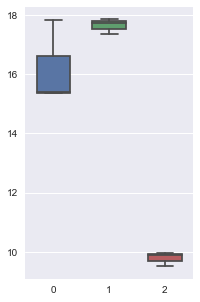

In [7]:
# to plot a feature at row # 51
print(mydata9.iloc[50, 6:])
# define groups
box9 = mydata9.iloc[50, 6:]
baseline, mock, infected = box9[3:6], box9[:3], box9[6:]

# plotting
fig = plt.figure(figsize=(3, 5))
sns.boxplot(data=[baseline, mock, infected], width=0.6)


### Note
Validation is usually needed to take your project to the next level.
In small size of samples, uniformly low numbers could be caused by imputation on the missing values. 
Always know your data.